In [24]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [25]:
data.dropna(inplace=True)
from sklearn.model_selection import train_test_split
x=data.drop("median_house_value", axis=1)
y=data['median_house_value']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

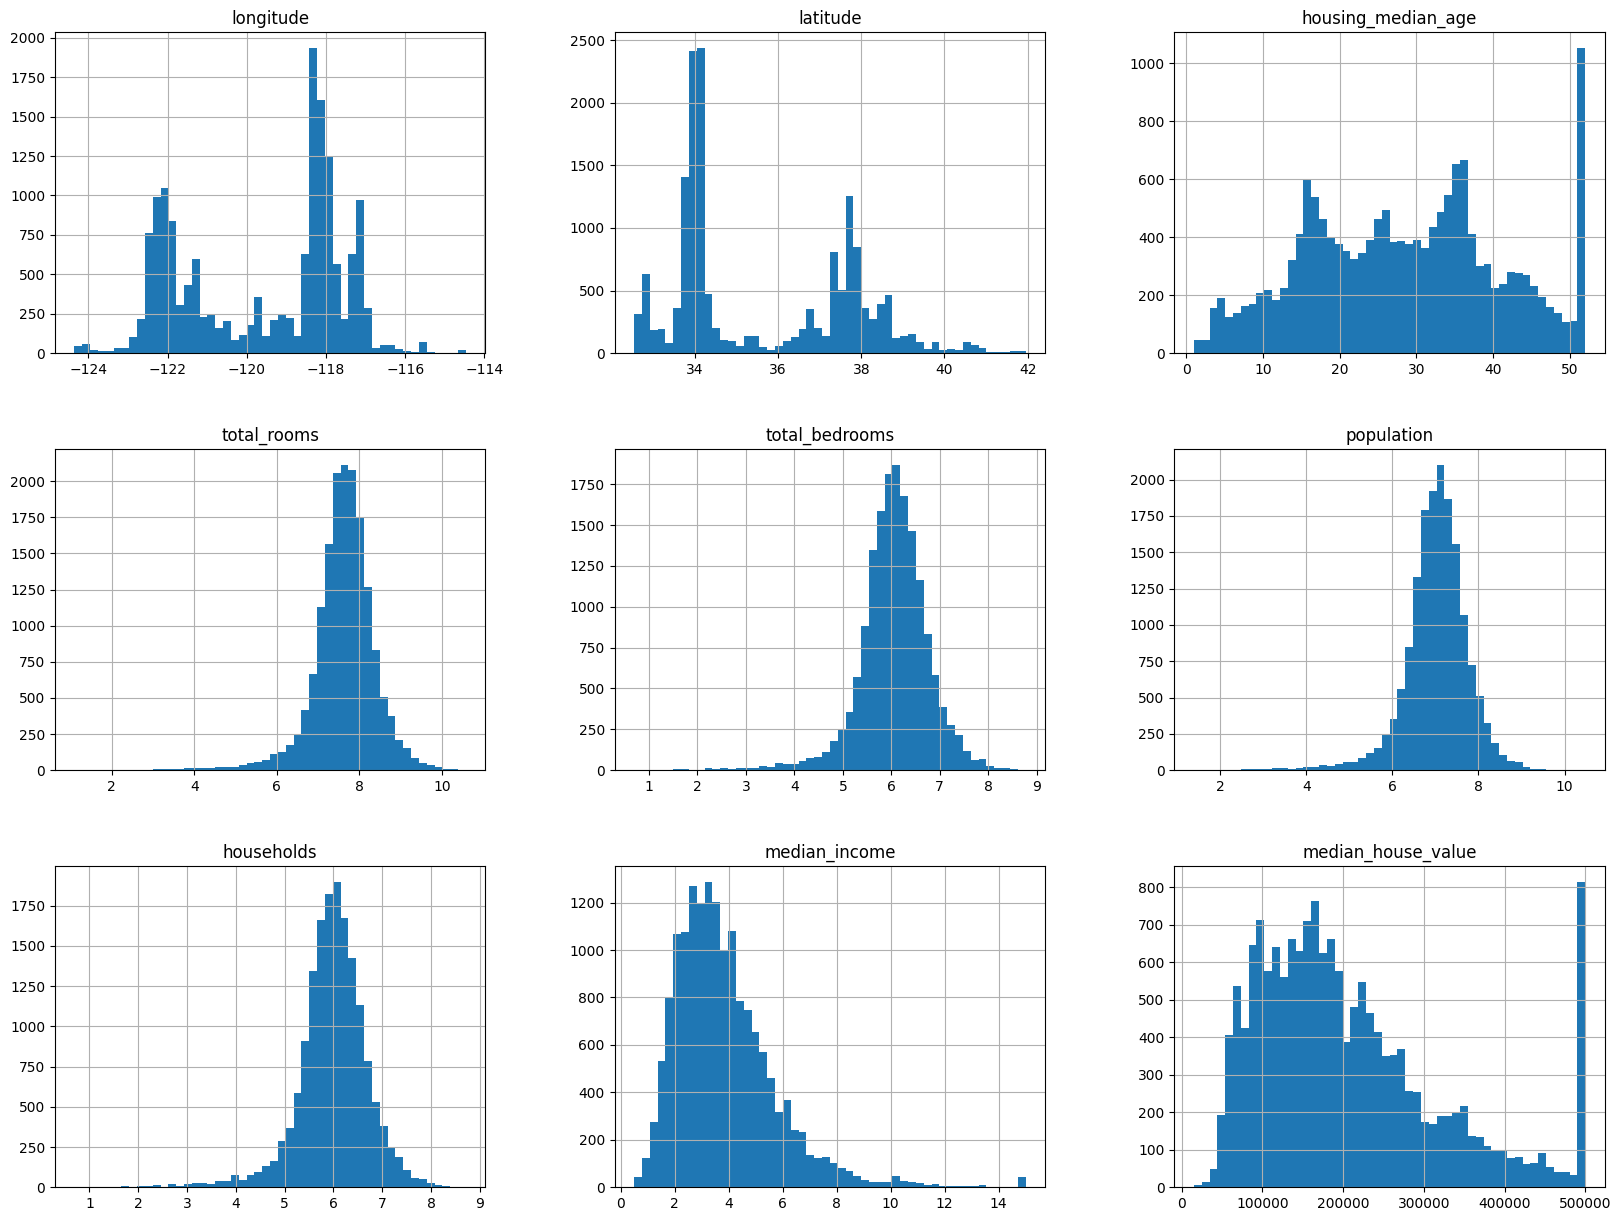

In [26]:
train_data=x_train.join(y_train)
skewed_features=["total_rooms","total_bedrooms","population","households"]
for feature in skewed_features:
    train_data[feature]=np.log1p(train_data[feature])
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:

train_data = pd.get_dummies(train_data, columns=["ocean_proximity"], drop_first=True)

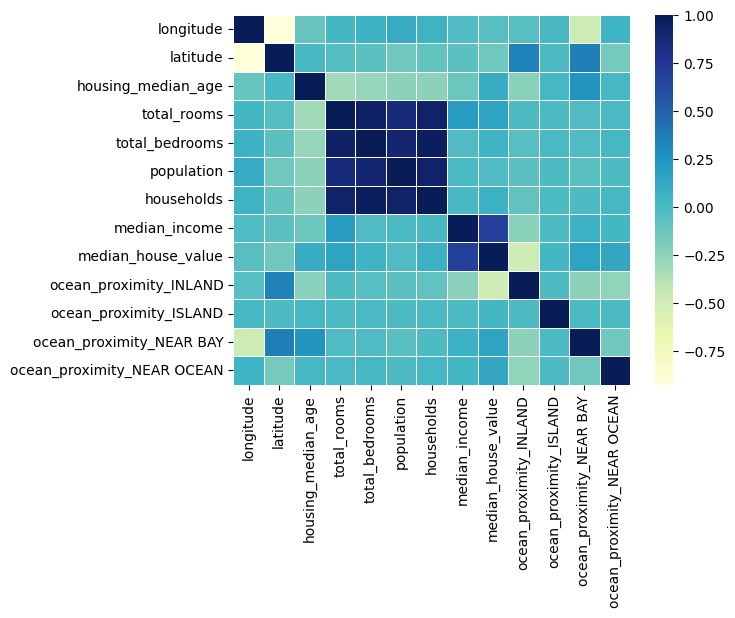

In [28]:
sns.heatmap(train_data.corr(), cmap='YlGnBu', linewidths=0.5)
plt.show()

In [29]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

In [30]:
x_train_processed= train_data.drop("median_house_value", axis=1)
y_train_processed= train_data["median_house_value"]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_processed)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled, y_train_processed)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
from sklearn.metrics import mean_squared_error
accuracy = model.score(X_test_scaled, y_test_processed)
accuracy

0.6585394617693114

In [35]:
import pickle
with open('housing_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('housing_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)